In [1]:
import numpy as np

In [2]:
import pandas as pd
# usa o pandas para ler csv
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
# pega os 5 primeiros elementos
dados.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()


nao_finalizado  horas_esperadas  preco
0               1               26    192
1               1               88   9015
2               1               89   2577
3               1               42    275
4               1               39    170

In [4]:
troca = {
    0 : 1,
    1 : 0
}
# cria uma nova coluna "finalizado" recebendo o mapeamento do valor inverso da coluna "nao_finalizado"
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

nao_finalizado  horas_esperadas  preco  finalizado
0               1               26    192           0
1               1               88   9015           0
2               1               89   2577           0
3               1               42    275           0
4               1               39    170           0

In [5]:
# ultimos 5 elementos
dados.tail()

nao_finalizado  horas_esperadas  preco  finalizado
2152               0               80   7518           1
2153               1               52   1332           0
2154               0               40    473           1
2155               0               75   5324           1
2156               1               37    377           0

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

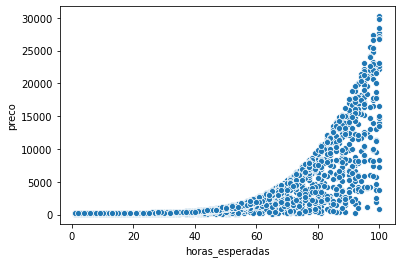

In [6]:
import seaborn as sns
# seaborn para plotar os graficos
#passa o nome das colunas para as 2 dimensoes e o pandas que contem os dados
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

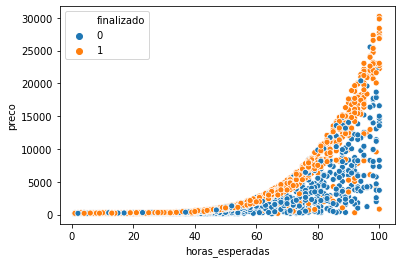

In [7]:
# passa o parametro hue que define cores de acordo com a coluna recebida
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

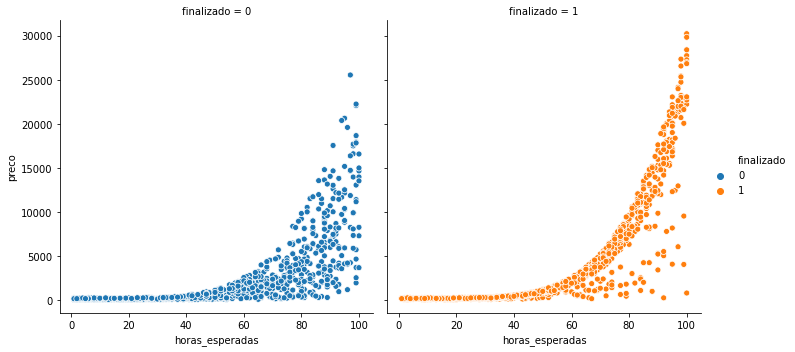

In [8]:
# replot mostra o grafico separadamente de acordo com a coluna "col"
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [9]:
# separa os valores dos resultados
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#cria uma semente para manter a consistencia dos testes e treinos
SEED = 5
# passando um valor para np.random.seed, faz com que train_test_split e no linearSVC 
# leiam a mesma seed e assim nao precisa passar como parametro
np.random.seed(SEED)
# a funcao train_test_split divide os dados que serao utilizados no treino ou no teste
# stratify = separar treino e teste proporcionalmente a coluna y para garantir que não vão 
# ser muitos de certa categoria e poucos de outra
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# modelando
modelo = LinearSVC()
#treinando
modelo.fit(treino_x, treino_y)
# testando
previsoes = modelo.predict(teste_x)

#calculando a acuracia
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [11]:
import numpy as np
#criando previsoes de base para comparar o acerto da base com o nosso modelo criado acima
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

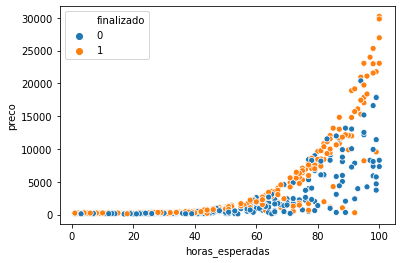

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [13]:
#valores maximo e minimo de cada dimensao
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [14]:
# preenche o eixo x e y criando varios pontos ao longo dos dois eixos
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
# mesclando as duas dimensoes
xx, yy = np.meshgrid(eixo_x, eixo_y)
# ravel concatena os elementos de xx e yy
# c_ mescla os dados de x e y, formando as tuplas (x,y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [16]:
# Z são as classificações
Z = modelo.predict(pontos)
# redimensiona os 10000 pontos criados para 100x100
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

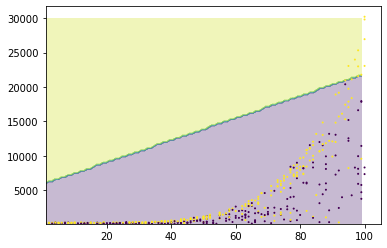

In [17]:
import matplotlib.pyplot as plt

# desenha o contorno da curva de decisão
plt.contourf(xx, yy, Z, alpha=0.3)

#plota o grafico usando matplotlib, passando as colunas das dimensoes, 
# color c = valor da classificacao e tamanho s dos pontos
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# usano agora um estimador não linear para tratar graficos como desse exemplo que nao se resolvem em linha reta
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


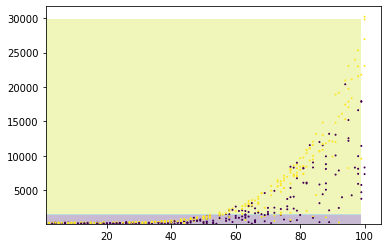

In [19]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY
# o problema de algoritmos como o SVC, é que eles são muito suscetíveis a escala
#enquanto o eixo x vai de 0 a 100, o y vai de 0 a 30000, isso atrapalha o algoritmo pois ele vai dar menos valor as variacoes de x e mais ao y 
#e precisamos reescalar tudo para uma mesma faixa

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 50
np.random.seed(SEED)
#treino x original, teste x original, treino
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#fase de pre-processamento
# o standardScaler já faz o trabalho de escalar os valores para um mesmo interval
scaler = StandardScaler()
scaler.fit(raw_treino_x)
#reescreve o treino e teste x na nova escala
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
#treina o modelo com a nova escala
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 69.26%


In [21]:
#treino x e teste x agora são um array de arrays, enquanto antes eram um dataframe do pandas
treino_x

array([[ 0.38667852, -0.26807202],
       [-0.46256993, -0.52053666],
       [ 0.77591739,  0.45720421],
       ...,
       [-1.20566232, -0.57192499],
       [-0.39179922, -0.52404041],
       [ 1.37746838,  2.36480136]])

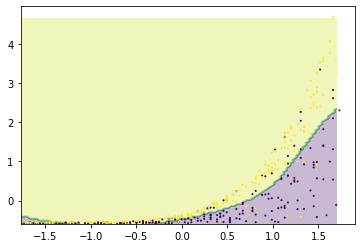

In [22]:
# data_x antigo na coluna 0 são as horas esperadas, na coluna 1 são os preços
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# copiando o codigo anterior de plot de grafico e substituindo agora as variaveis utilizadas 
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY

# Aula 5 - Dummy classifiers e árvores de decisão

In [23]:
import pandas as pd

#lendo csv que contem dados de carros a serem vendidos
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

In [24]:
#renomeando colunas
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco vendido
0           0           21801           2000   30941.02     yes
1           1            7843           1998   40557.96     yes
2           2            7109           2006   89627.50      no
3           3           26823           2015   95276.14      no
4           4            7935           2014  117384.68     yes

In [25]:
# troca os valores da coluna vendido por booleano 0 ou 1 (classificação binária)
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido
0           0           21801           2000   30941.02        1
1           1            7843           1998   40557.96        1
2           2            7109           2006   89627.50        0
3           3           26823           2015   95276.14        0
4           4            7935           2014  117384.68        1

In [26]:
from datetime import datetime
# se usarmos o ano do modelo apenas, a diferença percentual entre eles vai ser muito pequena
# ex: de 2000 para 1998 é uma diferença de 0,1%
# nós podemos criar uma nova coluna idade_do_modelo e calcular há quantos anos ele foi fabricado
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido  \
0           0           21801           2000   30941.02        1   
1           1            7843           1998   40557.96        1   
2           2            7109           2006   89627.50        0   
3           3           26823           2015   95276.14        0   
4           4            7935           2014  117384.68        1   

   idade_do_modelo  
0               21  
1               23  
2               15  
3                6  
4                7

In [27]:
#cria uma nova coluna km por ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido  \
0           0           21801           2000   30941.02        1   
1           1            7843           1998   40557.96        1   
2           2            7109           2006   89627.50        0   
3           3           26823           2015   95276.14        0   
4           4            7935           2014  117384.68        1   

   idade_do_modelo   km_por_ano  
0               21  35085.22134  
1               23  12622.05362  
2               15  11440.79806  
3                6  43167.32682  
4                7  12770.11290

In [28]:
#remove colunas que não serão utilizadas.
# por padrão a função drop remove linhas, então passamos o parametro axis=1 para remover a coluna
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano","ano_do_modelo"], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               21  35085.22134
1   40557.96        1               23  12622.05362
2   89627.50        0               15  11440.79806
3   95276.14        0                6  43167.32682
4  117384.68        1                7  12770.11290

In [29]:
#rodando o LinearSVC para o nosso conjunto de dados
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [30]:
# utilizando o dummy classifier do sklearn (classificador bobo que estávamos criando manualmente antes)
from sklearn.dummy import DummyClassifier

# por padrao o dummy utiliza a abordagem prior
dummy_prior = DummyClassifier()
dummy_prior.fit(treino_x, treino_y)
acuracia = dummy_prior.score(teste_x, teste_y) * 100

print("A acurácia do dummy prior foi %.2f%%" % acuracia)

# utilizando a abordagem stratificada. Ex: se tem 70% 0's e 30% 1's, ele tenta classificar como 70% 0's e 30% 1's
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

# utilizando a estrategia do mais frequente (que fizemos no inicio definindo todos como 0 ou todos como 1)
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy most_frequent foi %.2f%%" % acuracia)

A acurácia do dummy prior foi 58.00%
A acurácia do dummy stratified foi 52.44%
A acurácia do dummy most_frequent foi 50.68%


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# reescala os valores
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# treina com os valores reescalados
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


# Árvores de decisão
Com os algoritmos anteriores, não conseguíamos identificar as regras que eles estavam usando. Para isso, existe o Decision Tree Classifier

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# cria a arvore de decisao com um limite maximo de altura
# a funcao do DecisionTreeClassifier aceita diversos outros parâmetros e eles podem ser utilizados para otimizar os decisores
modelo = DecisionTreeClassifier(max_depth=4)

# as arvores de decisão não precisam de valores escalados! podemos treinar com o preço cru dos carros
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


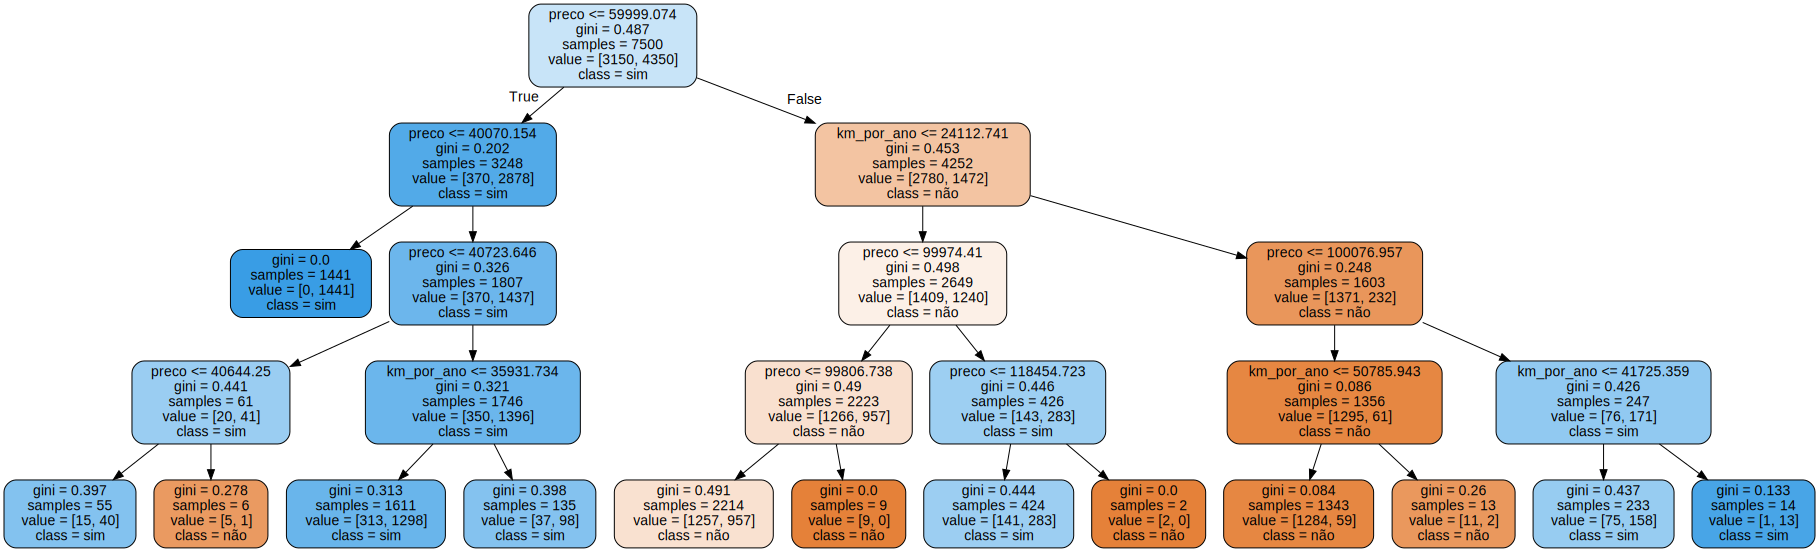

In [33]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

# exporta para a variavel dot_data os dados que serão usados para exibir a arvore de decisão
# filled preenche os nós da arvore com cores
# rounded arredonda o nó
# feature_names nomeia cada uma das features para ficar mais fácil de entender a arvore
# adiciona class_names para identificar cada uma das decisões
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

#as cores do grafico indicam o grau de certeza, quanto mais forte, mais certeza o algoritmo tem daquela decisão
# samples informa quantos dados caíram naquele nó